# DATA2001 Assignment 2 (Weight: 25%)


The aim of this assignment is to gain practical experience in analysing unstructured data. 
You should only submit your completed Jupyter notebook in .ipynb format via Blackboard, including written answers in markdown and results from executed code cells.


The assignment comprises 5 main tasks: Data Exploration, Data Preprocessing, Model Training, Model Evaluation, and Model Analysis. You will analyze and compare two different representations, Bag of Words (BOW) and Term Frequency-Inverse Document Frequency (TF-IDF). Additionally, you will address and compare two tasks: sentiment analysis and rating prediction.


The dataset you will work with in this assignment comprises text reviews about various hotels, extracted from Tripadvisor, along with their corresponding ratings.


## Task 1: Data Exploration





1. **Load the dataset from the file "hotel_reviews.csv". How many records does the dataset contain? How many distinct classes are there in the dataset?**


In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
!pip install nltk

import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s4670192/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/s4670192/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/s4670192/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

***NOTE TO EXAMINER: for the code above , there is a weird error with pip , if encountered , please "restart and run all"***

In [3]:
# Provide your answers here

# load the data 
hotel_data = pd.read_csv("hotel_reviews.csv")

#view the first few rows of the data
hotel_data.head(20)


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


### NUMBER OF RECORDS AND DISTINCT CLASSES IN THE DATASET

In [4]:
# Calculate the number of records
num_records = len(hotel_data)
print(f'The dataset contains {num_records} records.')

# Calculate the number of distinct classes in the entire dataset
num_classes = hotel_data.nunique().sum()
print(f'The dataset contains {num_classes} distinct classes.')

The dataset contains 20491 records.
The dataset contains 20496 distinct classes.


2. **Determine the top 10 most frequently used words in the dataset. To support your answer, create a bar plot where the x-axis represents words, and the y-axis represents the frequency of each word appearing in the entire dataset.**


In [5]:
from collections import Counter
import matplotlib.pyplot as plt

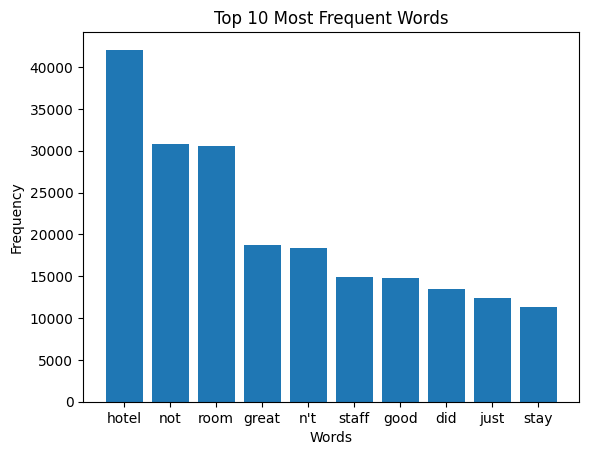

In [6]:
# Provide your answers here

# Get the word frequency
top_10_words = Counter(" ".join(hotel_data["Review"]).split()).most_common(10)

# Create a bar plot
plt.bar([word[0] for word in top_10_words], [count[1] for count in top_10_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()



3. **Among the top 10 most frequently used words, identify if there are any stop words included. If we exclude the stop words, would the top 10 most frequent words change? Create another bar plot similar to Question 2, but this time with the stop words removed to illustrate the updated top 10 most frequent words.**

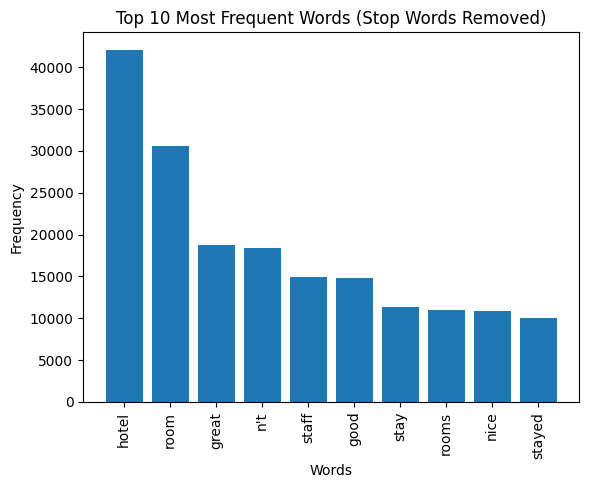

In [7]:
# Provide your answers here

# Remove stop words
stop_words = set(stopwords.words('english'))
hotel_data_without_stopwords = hotel_data['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Get the word frequency
word_counts = hotel_data_without_stopwords.str.split(expand=True).stack().value_counts().head(10)

# Create a bar plot
plt.bar(word_counts.index, word_counts.values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words (Stop Words Removed)')
plt.xticks(rotation='vertical')
plt.show()


**OBSERVATION** <BR>
The above bar graph does not include stop words. For example, words like 'just', 'not' have been removed here.


## Task 2: Data Preprocessing

- **Use the provided "clean_data" function to remove unnecessary symbols and clean the dataset.**



In [8]:
import re

def clean_data(text):
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'br', ' ', text)
    text = re.sub(r'\'', ' ', text)
    

    return text

In [9]:
# Provide your answers here

# Once you have written code to remove hashtags and @mentions, apply the function to clean the tweets.
hotel_data["Review"] = hotel_data["Review"].apply(clean_data)

- **Split the clean dataset into separate train and test sets. For this, use the "Review" field as the feature vector (X) and the "Rating" field as the label vector (Y).**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Provide your answers here

# define random state to make random processes reprodible
random_state = np.random.RandomState(0)

# define X (features) and Y (target)
X = hotel_data["Review"]
y = hotel_data["Rating"] #1,2,3,4,5

# split the data into train-test split where 30% of data will be used as test set
# splitting data for: 70% data for training and rest for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)


- **Create an additional binary label by assigning ‘1’ – positive for the product ratings 4 and 5; and "–1" for product ratings 1, 2 and 3. Store it in y_train_binary and y_test_binary.**

*Tip: you can use a function copy.deepcopy for creating a copy of label variables* 

In [12]:
import copy

In [13]:
# Provide your answers here

# Create a deep copy of y_train and y_test
y_train_binary = copy.deepcopy(y_train)
y_test_binary = copy.deepcopy(y_test)

# Assign 1 for ratings 4 and 5
y_train_binary[(y_train == 4) | (y_train == 5)] = 1
y_test_binary[(y_test == 4) | (y_test == 5)] = 1

# Assign -1 for ratings 1, 2, and 3
y_train_binary[(y_train == 1) | (y_train == 2) | (y_train == 3)] = -1
y_test_binary[(y_test == 1) | (y_test == 2) | (y_test == 3)] = -1

In [14]:
# check if the bianry labels (-1 and 1) are now added instead of the old ratings (1,2,3,4,5)
y_train_binary
y_test_binary

3822    -1
9452    -1
12622    1
6716     1
7562    -1
        ..
10452   -1
2575     1
852      1
4855     1
12643    1
Name: Rating, Length: 6148, dtype: int64


- **Transform the cleaned data into a numerical representation using Bag of Words (BoW) and remove any stop words. Save the BoW representation in the variables train_data_BOW and test_data_BOW.**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.linear_model import LogisticRegression
# Provide your answers here

# BOW -> seeing the frequency of each word i.e, how many times a word appears

# define stop words 
stop_words = stopwords.words('english')

# define CountVectorizer object
# min_df=0.01 means words that belong to only 1% of the all Reviews will be excluded in the BOW
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=0.01)

#  BOW for Training data
train_data_BOW = vectorizer.fit_transform(X_train)

#  BOW for Testing data
test_data_BOW = vectorizer.transform(X_test)


In [16]:
# check if the BOW for both training and testing have been created
train_data_BOW
test_data_BOW


<6148x1391 sparse matrix of type '<class 'numpy.int64'>'
	with 364536 stored elements in Compressed Sparse Row format>

In [17]:
train_data_BOW.shape
test_data_BOW.shape

(6148, 1391)

- **Create another numerical representation of the text using Term Frequency-Inverse Document Frequency (TfIdf) and remove the stop words. Save the TfIdf representation in the variables train_data_tfidf and test_data_tfidf.**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

'''
To calculate the TF-IDF representation of text, use the TfidfVectorizer class from the sklearn.feature_extraction.text library.
This class converts a collection of raw documents into a matrix of TF-IDF features3.
By removing common English stop words, it focuses on capturing the unique characteristics of each document.
'''

# Provide your answers here

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer object to train data
train_data_tfidf = vectorizer.fit_transform(X_train)

# Transform test data using the fitted vectorizer
test_data_tfidf = vectorizer.transform(X_test)


## Task 3: Model Training

Define 3 Logistic Regression models: *model1, model2* and *model3* and train the models as follows:
- Train the first Logistic Regression model using the Bag of Words representation (train_data_BOW) to predict the hotel rating (Y).

- Train the second Logistic Regression model using the TfIdf representation (train_data_tfidf) to predict the hotel rating (Y).

- Train the third Logistic Regression model using the TfIdf representation (train_data_tfidf) to predict the binary sentiment label (Y_binary). 

- Make and store predictions on appropriate test sets (X_test_BOW for model1 and X_test_tfidf for model2 and model3)

## MODEL 1 
***Logistic Regression model trained using the Bag of Words representation (train_data_BOW) to predict the hotel rating (Y).***

In [19]:
# LOGISTIC REGRESSION : It is a popular algorithm for binary classification tasks,
                        # where it predicts the probability of an input belonging to a certain class.

# based on the BOW created above, see what is the nature of comments
# E.g according to BOW, if a certain negative word, say 'bad' appears many times, then
# Logistic Regreession would predict the nature of the comment to be negative

from sklearn.linear_model import LogisticRegression

# define logistic regression model object
model1 = LogisticRegression(random_state=random_state)

# Fit the model with the training data
model1.fit(train_data_BOW, y_train)

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF9D902E40)

In [20]:
# MAKE PREDICTION ON TEST DATA
# predict using model1 object (the variable 'test_data_BOW' was created above while making BOW)
y_test_model1_predictions = model1.predict(test_data_BOW)

# view the predictions
y_test_model1_predictions

array([2, 1, 5, ..., 5, 4, 5])

## MODEL 2
***Logistic Regression modeltrained using the TfIdf representation (train_data_tfidf) to predict the hotel rating (Y).***


In [21]:
from sklearn.linear_model import LogisticRegression

# define logistic regression model object
model2 = LogisticRegression(random_state=random_state)

# Fit the model with the training data
model2.fit(train_data_tfidf, y_train)

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF9D902E40)

In [22]:
# MAKE PREDICTION ON TEST DATA

# predict using model2 object (the varibale 'test_data_tfidf' was created above while cerating TF-IDF representation of text)
y_test_model2_predictions = model2.predict(test_data_tfidf)

# view the predictions
y_test_model2_predictions

array([2, 4, 5, ..., 5, 5, 5])

## MODEL 3
***Logistic Regression model trained using the TfIdf representation (train_data_tfidf) to predict the binary sentiment label (Y_binary).***

In [23]:
from sklearn.linear_model import LogisticRegression

# define logistic regression model object
model3 = LogisticRegression(random_state=random_state)

# Fit the model with the training data
model3.fit(train_data_tfidf, y_train_binary)

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF9D902E40)

In [24]:
# MAKE PREDICTION ON TEST DATA

# predict using model3 object
y_test_model3_predictions = model3.predict(test_data_tfidf)

# view the predictions
y_test_model3_predictions

array([-1, -1,  1, ...,  1,  1,  1])


## Task 4: Model Evaluation

- **Compute and compare the test accuracy of Model 1 (Logistic Regression with BoW representation) and Model 2 (Logistic Regression with TfIdf representation). Based on your results, determine which embedding method yields higher performance in predicting the hotel ratings (Y).**

#### MODEL 1 test accuracy V/S MODEL 2 test accuracy

In [25]:
from sklearn.metrics import accuracy_score

# Provide your answers here

# To compute and compare the test accuracy of Model 1 (Logistic Regression with BoW representation)
# and Model 2 (Logistic Regression with TfIdf representation), use the accuracy_score function from the sklearn.metrics module. 

# Compute the test accuracy of Model 1
model1_accuracy = accuracy_score(y_test, y_test_model1_predictions)

# Compute the test accuracy of Model 2
model2_accuracy = accuracy_score(y_test, y_test_model2_predictions)

print(f"Model 1 (Logistic Regression with BoW representation) test accuracy: {model1_accuracy:.4f}")
print(f"Model 2 (Logistic Regression with TfIdf representation) test accuracy: {model2_accuracy:.4f}")


Model 1 (Logistic Regression with BoW representation) test accuracy: 0.5655
Model 2 (Logistic Regression with TfIdf representation) test accuracy: 0.6088


**OBSERVATION** <br>
The test accuracy of Model 1 is 0.5655 and the test accuracy of Model 2 is 0.6088. <BR>
Therefore, we can conclude that Model 2 (Logistic Regression with TfIdf representation) yields higher performance in predicting the hotel ratings (Y) than Model 1 (Logistic Regression with BoW representation).

- **Compute and compare the test accuracy of Model 2 and Model 3. Based on your results, analyze which task is easier: binary sentiment prediction or multi-class rating prediction.**

#### MODEL 2 test accuracy V/S MODEL 3 test accuarcy

In [26]:
# Provide your answers here

# To compute and compare the test accuracy of Model 2 and Model 3,
# use the accuracy_score function from the sklearn.metrics module. 

# Compute the test accuracy of Model 2
model2_accuracy = accuracy_score(y_test, y_test_model2_predictions)

# Compute the test accuracy for Model 3
model3_accuracy = accuracy_score(y_test_binary, y_test_model3_predictions)


print(f"Model 2 (Logistic Regression with TfIdf representation to predict the hotel rating (Y)) test accuracy : {model2_accuracy:.4f}")
print(f"Model 3 (Logistic Regression with TfIdf representation to predict the binary sentiment label(Y binary)) test accuracy: {model3_accuracy:.4f}")


Model 2 (Logistic Regression with TfIdf representation to predict the hotel rating (Y)) test accuracy : 0.6088
Model 3 (Logistic Regression with TfIdf representation to predict the binary sentiment label(Y binary)) test accuracy: 0.8905


**OBSERVATION** <br>
The test accuracy of Model 2 is 0.6088 and the test accuracy of Model 3 is 0.8905. <BR>

Thus, Model 3 has a higher test accuracy as compared to Model 2. <BR>

Therefore, we can conclude that binary sentiment prediction is an easier task than multi-class rating prediction. <BR>

Binary sentiment prediction is considered to be an easier task than multi-class rating prediction because it involves predicting only two classes (positive or negative) as opposed to multiple classes (1-5 stars).



- **For Model 2,  compute additional evaluaton measures, namely confusion matrix, precision and recall.** 

### CONFUSION MATRIX FOR MODEL 2

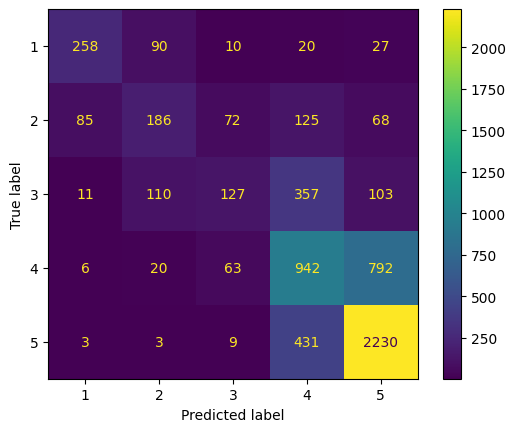

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_model2_predictions)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
display.plot();


**OBSERVATION** <br>
The above shown confusion matrix shows the accuracy of the predictions made by Model 2. <BR>
For example, (in top left corner), 85 samples were predicted to be label 1 but in reality, they were label 2.

### PRECISION OF MODEL 2

In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_model2_predictions)

# Compute precision and recall
precision = precision_score(y_test, y_test_model2_predictions, average='weighted')

print("Precision of Model 2 =", precision)

Precision of Model 2 = 0.588926864736754


**OBSERVATION** <BR> 
    
**Precision** is a measure of the accuracy of the model’s positive predictions. It is defined as the ratio of true positives (TP) to the sum of true positives and false positives (FP). In other words, precision is the proportion of positive predictions that are actually true. <BR>

                                            Precision = TP/(TP+FP)
    
* Precision of Model 2 is 0.588926864736754. <BR>
This means that out of all the positive predictions made by Model 2, only 58.89% were actually true.

### RECALL OF MODEL 2

In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_model2_predictions)

# compute recall
recall = recall_score(y_test, y_test_model2_predictions, average='weighted')

print("Recall of Model 2 =", recall)


Recall of Model 2 = 0.6088158750813273


**OBSERVATION** <BR> <BR>
**Recall** is a measure of the completeness of the model’s positive predictions. It is defined as the ratio of true positives (TP) to the sum of true positives and false negatives (FN). In other words, recall is the proportion of actual positives that are correctly identified by the mode.

                                            Recall = TP/(TP+FN)  
* Recall of Model 2 is  0.6088158750813273 <BR>
This means that out of all the actual positive instances in our data, only 60.88% were correctly identified by Model 2.

## Task 5: Model Analysis



- **Based on the confusion matrix obtained in the previous question (referring to Model 2, the Logistic Regression with TfIdf representation for rating prediction), identify and state the number of samples that were classified to have the rating of 5 (the highest rating), but in reality, they had an actual rating of 1 (the lowest rating).**

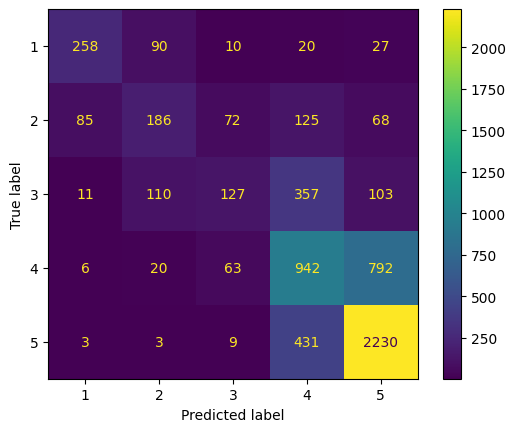

In [30]:
# Provide your answer here

# Computing the confusion matrix again
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_test_model2_predictions)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
display.plot();


**ANSWER:**<br>
Based on the confusion matrix, **27** samples were classified to have the rating of 5 (the highest rating), but in reality, they had an actual rating of 1 (the lowest rating).

- **Discuss the importance of considering alternative evaluation measures, such as precision and recall, instead of relying solely on accuracy. Based on this discussion, identify the most suitable evaluation metric for Model 2.**

**ANSWER** <BR>
**Model evaluation metrics** are used to assess the performance of a machine learning model. **Accuracy** is one such metric that is commonly used to evaluate models. However, it is not always the most suitable metric for every problem. In some cases, it may be more appropriate to use **precision** and **recall** instead of accuracy.

**Precision** measures the proportion of true positives among all positive predictions made by the model. It is calculated as follows:

$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$$

**Recall**, on the other hand, measures the proportion of true positives among all actual positive instances in the data. It is calculated as follows:

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$

In some cases, it may be more important to optimize for precision or recall instead of accuracy. For example, in a spam detection system, it may be more important to minimize false positives (i.e., classify an email as spam when it is not) than false negatives (i.e., classify a spam email as not spam). In such cases, precision would be a more suitable metric than accuracy.

For **Model 2**, which is a logistic regression model trained using the TfIdf representation to predict hotel ratings, it would be appropriate to consider alternative evaluation measures such as precision and recall in addition to accuracy. Since this is a multi-class classification problem, we can use the **macro-averaged F1 score** as an evaluation metric. The macro-averaged F1 score calculates the F1 score for each class separately and then takes the average across all classes. It is calculated as follows:

$$\text{Macro-averaged F1 score} = \frac{1}{k}\sum_{i=1}^{k}\frac{2\times\text{Precision}_i\times\text{Recall}_i}{\text{Precision}_i+\text{Recall}_i}$$

where $k$ is the number of classes.

The macro-averaged F1 score is a suitable evaluation metric for Model 2 because it takes into account both precision and recall and provides an overall measure of performance across all classes.



- **For binary sentiment prediction (Model 3), visualize important words with their model coefficients.**

*Tip: you can reuse the function plot_coefficients from prac. session.*

In [31]:
# Provide your answers here

def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()

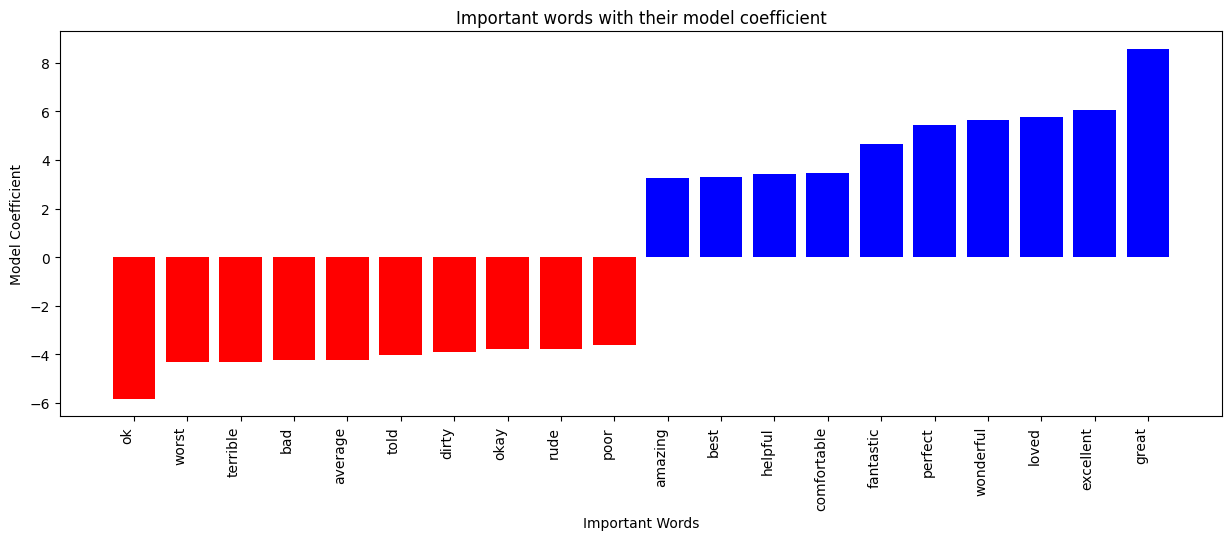

In [32]:
plot_coefficients(model3, vectorizer.get_feature_names_out())

**OBSERVATION** <BR>
The plot shows 20 words which played important role in making predictions. The red bars show top 10 words with negative model coefficient and blue bars show top 10 words with positive model coefficient values.